           日期        成交股數            成交金額    開盤價    最高價    最低價    收盤價    漲跌價差  \
0  2024-09-02  19,272,593  18,270,058,260  950.0  955.0  943.0  948.0   +4.00   
1  2024-09-03  23,205,623  21,908,471,541  948.0  952.0  939.0  940.0   -8.00   
2  2024-09-04  93,169,835  83,424,133,824  894.0  905.0  888.0  889.0  -51.00   
3  2024-09-05  34,147,890  30,998,595,394  907.0  915.0  900.0  902.0  +13.00   
4  2024-09-06  28,248,063  25,786,016,936  909.0  918.0  903.0  918.0  +16.00   
5  2024-09-09  38,448,946  34,456,838,126  892.0  900.0  891.0  899.0  -19.00   
6  2024-09-10  34,312,646  31,067,424,234  907.0  911.0  901.0  904.0   +5.00   
7  2024-09-11  19,513,256  17,621,000,956  906.0  906.0  900.0  901.0   -3.00   
8  2024-09-12  43,749,260  40,999,951,508  936.0  944.0  928.0  940.0   X0.00   
9  2024-09-13  28,307,441  26,795,862,243  955.0  955.0  939.0  947.0   +7.00   
10 2024-09-16  14,456,888  13,692,259,575  952.0  952.0  943.0  947.0    0.00   
11 2024-09-18  30,094,662  2

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


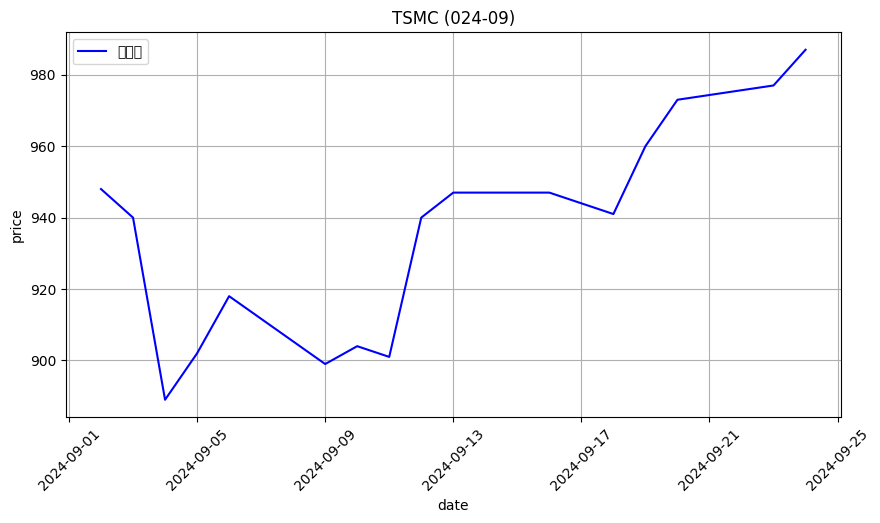

In [ ]:
from pickle import encode_long
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 將民國日期轉換為西元日期
def convert_roc_to_ad(roc_date: str) -> str:
    # 假設日期格式為 "112/08/01" -> "2023/08/01"
    roc_year, month, day = roc_date.split('/')
    ad_year = str(int(roc_year) + 1911)  # 民國年 + 1911 = 西元年
    return f'{ad_year}/{month}/{day}'

# 從台灣證券交易所抓取資料
def get_twse_data(date: str, stock_no: str):
    url = f'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}'
    response = requests.get(url)
    data = response.json()

    # 將抓取的資料轉換為 DataFrame
    df = pd.DataFrame(data['data'], columns=['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'])

    # 將民國日期轉換為西元日期，並轉換為 datetime 格式
    df['日期'] = pd.to_datetime(df['日期'].apply(convert_roc_to_ad))

    # 把數字型欄位轉換為浮點數
    df['開盤價'] = pd.to_numeric(df['開盤價'], errors='coerce')
    df['最高價'] = pd.to_numeric(df['最高價'], errors='coerce')
    df['最低價'] = pd.to_numeric(df['最低價'], errors='coerce')
    df['收盤價'] = pd.to_numeric(df['收盤價'], errors='coerce')

    return df

# 抓取股票的股價數據(日期,股票代號)
df_twse = get_twse_data('202409024', '2330')

# 顯示 DataFrame 資料
print(df_twse)

# 繪製收盤價折線圖
plt.figure(figsize=(10, 5))
plt.plot(df_twse['日期'], df_twse['收盤價'], label='收盤價', color='blue')
plt.title('TSMC (024-09)')
plt.xlabel('date')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
!pip install yfinance

                                  Open         High         Low        Close  \
Date                                                                           
2024-08-26 00:00:00+08:00   952.751271   956.733513  940.804547   945.782349   
2024-08-27 00:00:00+08:00   940.804552   941.800113  935.826750   937.817871   
2024-08-28 00:00:00+08:00   940.804508   959.720154  938.813387   959.720154   
2024-08-29 00:00:00+08:00   937.817855   942.795657  932.840053   938.813416   
2024-08-30 00:00:00+08:00   939.808960   947.773443  936.822279   939.808960   
2024-09-02 00:00:00+08:00   945.782319   950.760121  938.813397   943.791199   
2024-09-03 00:00:00+08:00   943.791204   947.773445  934.831161   935.826721   
2024-09-04 00:00:00+08:00   890.030963   900.982127  884.057601   885.053162   
2024-09-05 00:00:00+08:00   902.973224   910.937707  896.004302   897.995422   
2024-09-06 00:00:00+08:00   904.964335   913.924377  898.990973   913.924377   
2024-09-09 00:00:00+08:00   888.039806  

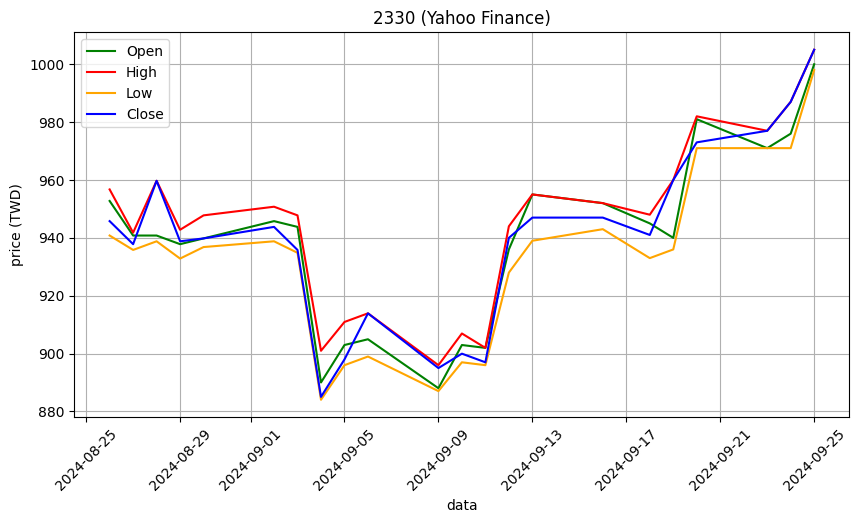

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# 從 Yahoo Finance 抓取資料
def get_yahoo_data(stock_symbol: str, period='1mo'):
    stock = yf.Ticker(stock_symbol)
    df = stock.history(period=period)

    # 只取需要的欄位：開盤價、最高價、最低價、收盤價、成交量
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

    return df

# 抓取台積電 (2330.TW) 一個月的股價數據
df_yahoo = get_yahoo_data('2330.TW', '1mo')

# 顯示 DataFrame 資料
print(df_yahoo)

# 繪製開盤價、最高價、最低價與收盤價的折線圖
plt.figure(figsize=(10, 5))
plt.plot(df_yahoo.index, df_yahoo['Open'], label='Open', color='green')
plt.plot(df_yahoo.index, df_yahoo['High'], label='High', color='red')
plt.plot(df_yahoo.index, df_yahoo['Low'], label='Low', color='orange')
plt.plot(df_yahoo.index, df_yahoo['Close'], label='Close', color='blue')

plt.title('2330 (Yahoo Finance)')
plt.xlabel('data')
plt.ylabel('price (TWD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()